# Pre- & Post- Acceptance Conditions

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Initialization
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import matplotlib.table as tbl
plt.style.use('seaborn-darkgrid')

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

## Which subjects are going to be looke at?
__Completed
__Exp Incomplete

In [18]:
# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
Demographics = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "Master Data")
Demographics = Demographics.set_index('Participant ID')

status = Demographics.groupby('Participant Status')

completed_IDs = np.array(status.groups['All Completed'])
ss_incompleted_IDs = np.array(status.groups['Exp Incomplete'])
CIC_IDs = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs))) # CIC = Complete and incomplete IDs

In [19]:
Analyzed_IDs = completed_IDs[4:]
Analyzed_IDs

array([22., 23., 25., 26., 27., 28., 33.])

## Reading ACC Scores

In [20]:
def read_acc_questionnaire(excel, worksheet):
    df = pd.read_excel(Qualitative_Path + excel + ".xlsx", sheet_name = worksheet)
    df.columns = df.loc[0,:]
    df.drop(index = 0)
    df = df.set_index('Participant ID')
    df = df.drop(index = 'Participant ID')
    
    ## Looking only into the ones picked for analysis
#    Analyzed_IDs_2 = np.sort(np.concatenate((completed_IDs, ss_incompleted_IDs)))
#    Analyzed_df = df.loc[Analyzed_IDs_2].dropna()
    
    return df#, Analyzed_df

# reading the acceptance masterlist into a dataframe--- index = participant ID, colums = feature label
ACC_master= read_acc_questionnaire("AcceptabilityQuestionnaires", "Acceptability_MasterList")
#, Analyzed_ACC_master 
# Pre-exposure acceptability questionnaire
ACC_PRE      = read_acc_questionnaire("AcceptabilityQuestionnaires", "PRE")
#, Analyzed_ACC_PRE 
# Post exposure acceptability questionnaire
ACC_POST   = read_acc_questionnaire("AcceptabilityQuestionnaires", "POST")
#, Analyzed_ACC_POST  

### Pre-Comfort

In [21]:
pre_comfort = ACC_PRE.loc[Analyzed_IDs][['No Automation Comfort', 'Emergency Only Comfort', 'Help Driver Comfort',
                           'Partial Autonomy Comfort', 'Full Autonomy Comfort']]
#pre_comfort['Pre/Post'] = "Pre"
pre_comfort

,No Automation Comfort,Emergency Only Comfort,Help Driver Comfort,Partial Autonomy Comfort,Full Autonomy Comfort
Participant ID,,,,,
22,5,3,3,2,1
23,5,5,4,3,4
25,4,2,4,3,3
26,5,3,2,4,1
27,4,5,5,5,3
28,5,5,5,5,5
33,5,5,3,3,5


### Post comfort

In [22]:
help_df = ACC_POST.loc[Analyzed_IDs]
help_df.drop(help_df.loc[help_df["Status"] == "No Data Available"].index, inplace= True) # deleting those whose status in not 

post_comfort = help_df[['No Automation Comfort', 'Emergency Only Comfort', 'Help Driver Comfort',
                              'Partial Autonomy Comfort', 'Full Autonomy Comfort']]
#post_comfort['Pre/Post'] = "Post"
post_comfort

,No Automation Comfort,Emergency Only Comfort,Help Driver Comfort,Partial Autonomy Comfort,Full Autonomy Comfort
Participant ID,,,,,
22,1,2,2,1,1
23,4,5,5,3,2
25,5,4,4,3,3
26,5,1,1,2,2
27,3,4,5,5,4
28,5,5,5,5,5
33,5,4,3,1,5


In [23]:
difference = (post_comfort - pre_comfort).dropna()
difference 

,No Automation Comfort,Emergency Only Comfort,Help Driver Comfort,Partial Autonomy Comfort,Full Autonomy Comfort
Participant ID,,,,,
22,-4,-1,-1,-1,0
23,-1,0,1,0,-2
25,1,2,0,0,0
26,0,-2,-1,-2,1
27,-1,-1,0,0,1
28,0,0,0,0,0
33,0,-1,0,-2,0


In [24]:
counts = pd.DataFrame()
counts['Changed for Worse'] = (difference < 0).sum(axis = 0)*100/len(difference)
counts['No Change of Opinion'] = (difference == 0).sum(axis = 0)*100/len(difference)
counts['Changed for Better'] = (difference > 0).sum(axis = 0)*100/len(difference)

counts

,Changed for Worse,No Change of Opinion,Changed for Better
0,,,
No Automation Comfort,42.857143,42.857143,14.285714
Emergency Only Comfort,57.142857,28.571429,14.285714
Help Driver Comfort,28.571429,57.142857,14.285714
Partial Autonomy Comfort,42.857143,57.142857,0.000000
Full Autonomy Comfort,14.285714,57.142857,28.571429


Text(0.5, 0, 'Percentage of Participants (%)')

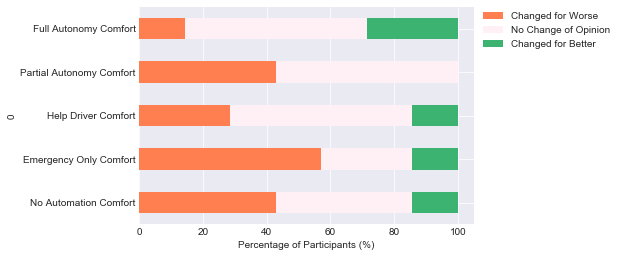

In [25]:
my_pal = ['coral',"lavenderblush", 'mediumseagreen']

counts.plot.barh(stacked=True, color = my_pal); 
plt.legend(bbox_to_anchor=(1, 1.02)); plt.xlabel("Percentage of Participants (%)")